In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [2]:
df = pd.read_csv('payment fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.drop(['isFlaggedFraud'],axis = 1, inplace = True )

In [6]:
df.drop(df.index[2430:6362620],inplace=True)

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2425,1,PAYMENT,6365.00,C1209962934,0.0,0.00,M2089786414,0.0,0.0,0
2426,1,PAYMENT,26035.82,C336400944,0.0,0.00,M1019157412,0.0,0.0,0
2427,1,PAYMENT,12000.58,C1097380,0.0,0.00,M8268900,0.0,0.0,0
2428,1,PAYMENT,5717.58,C2082353865,0.0,0.00,M943219925,0.0,0.0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2425,1,PAYMENT,6365.00,C1209962934,0.0,0.0,M2089786414,0.0,0.0,0
2426,1,PAYMENT,26035.82,C336400944,0.0,0.0,M1019157412,0.0,0.0,0
2427,1,PAYMENT,12000.58,C1097380,0.0,0.0,M8268900,0.0,0.0,0
2428,1,PAYMENT,5717.58,C2082353865,0.0,0.0,M943219925,0.0,0.0,0
2429,1,PAYMENT,15646.06,C1037572328,0.0,0.0,M1286868539,0.0,0.0,0


In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2425,1,PAYMENT,6365.00,C1209962934,0.0,0.0,M2089786414,0.0,0.0,0
2426,1,PAYMENT,26035.82,C336400944,0.0,0.0,M1019157412,0.0,0.0,0
2427,1,PAYMENT,12000.58,C1097380,0.0,0.0,M8268900,0.0,0.0,0
2428,1,PAYMENT,5717.58,C2082353865,0.0,0.0,M943219925,0.0,0.0,0
2429,1,PAYMENT,15646.06,C1037572328,0.0,0.0,M1286868539,0.0,0.0,0


In [11]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [12]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,NaN,1.000000,0.080358,0.078667,0.428892,0.497392,0.043657
oldbalanceOrg,NaN,0.080358,1.000000,0.998728,0.173727,0.132877,-0.026329
newbalanceOrig,NaN,0.078667,0.998728,1.000000,0.175932,0.132457,-0.034487
oldbalanceDest,NaN,0.428892,0.173727,0.175932,1.000000,0.866493,-0.026214
newbalanceDest,NaN,0.497392,0.132877,0.132457,0.866493,1.000000,-0.005585
isFraud,NaN,0.043657,-0.026329,-0.034487,-0.026214,-0.005585,1.000000


## Heatmap

<Axes: >

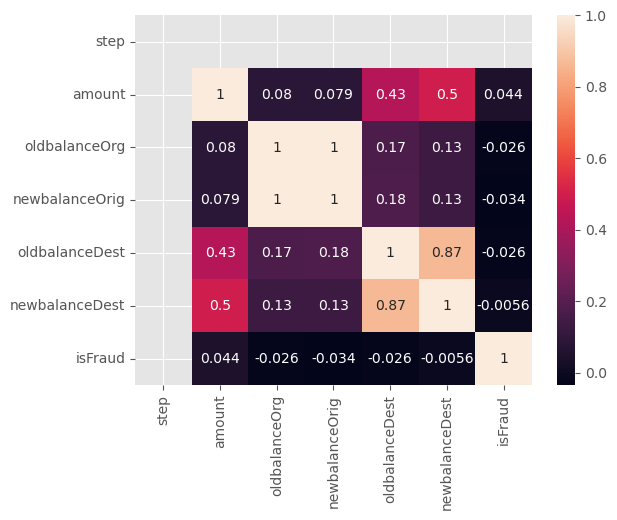

In [13]:
sns.heatmap(df.corr(),annot=True)

## Univariate Analysis

<Axes: xlabel='step', ylabel='Count'>

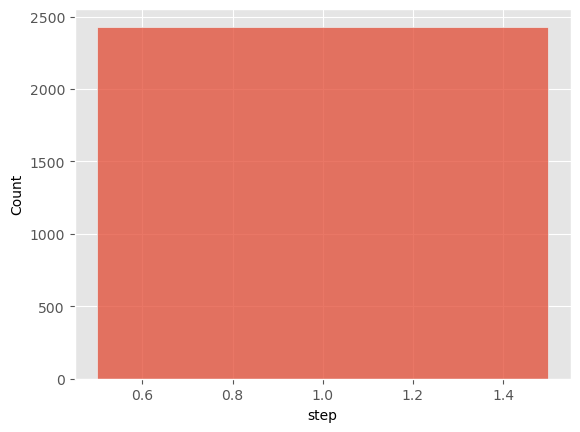

In [14]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

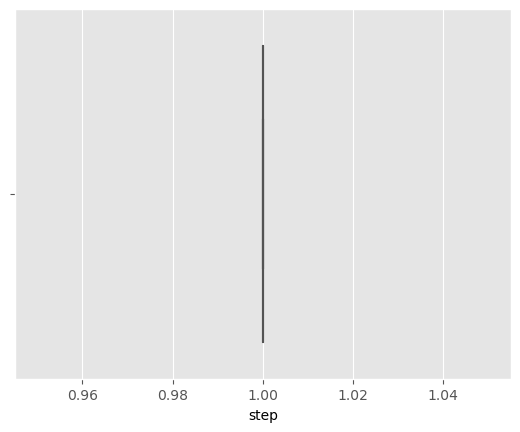

In [15]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

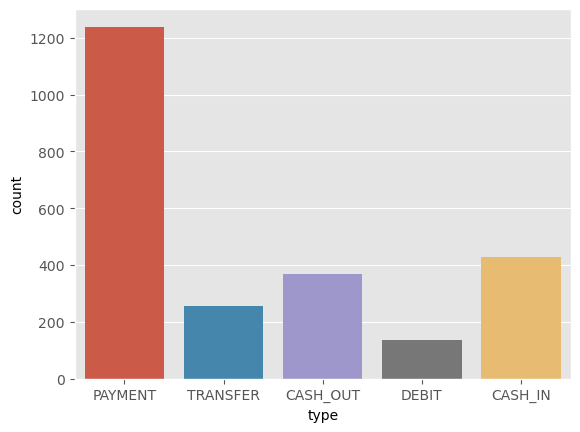

In [16]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

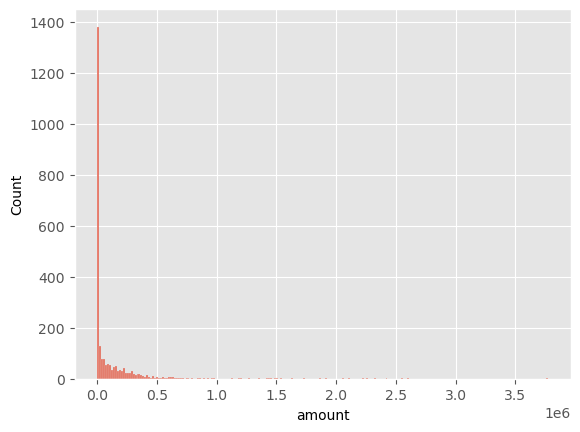

In [17]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

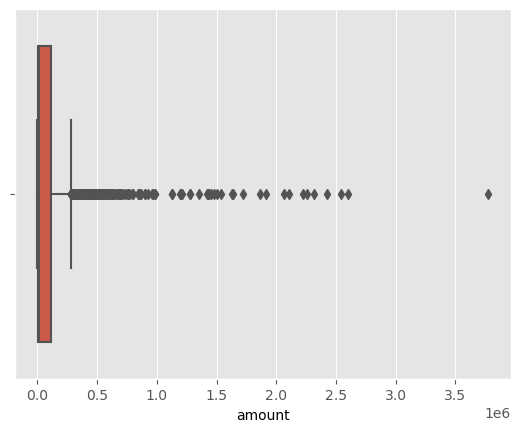

In [18]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

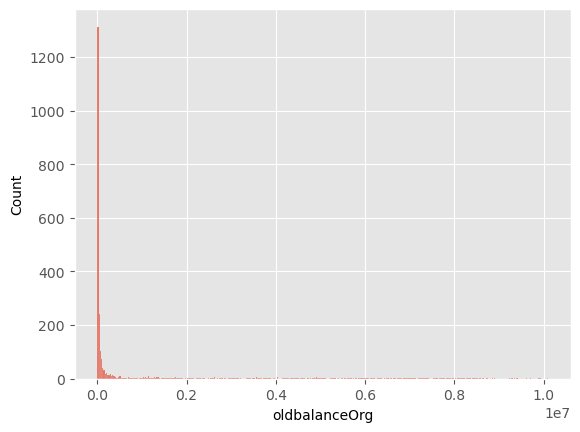

In [19]:
sns.histplot(data=df,x='oldbalanceOrg')

In [20]:
#nameDest
df['nameDest'].value_counts()

C985934102     32
C1590550415    29
C564160838     25
C1023714065    22
C401424608     21
               ..
C644345897      1
C431687661      1
M261845810      1
M546796969      1
M1286868539     1
Name: nameDest, Length: 1475, dtype: int64

<Axes: xlabel='oldbalanceDest'>

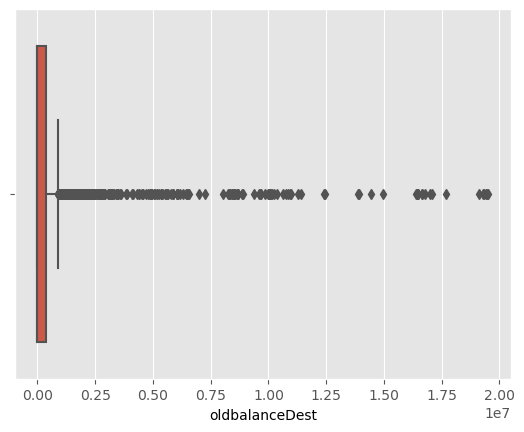

In [21]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

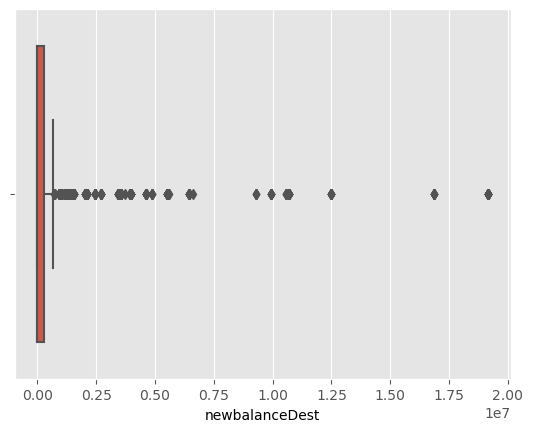

In [22]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

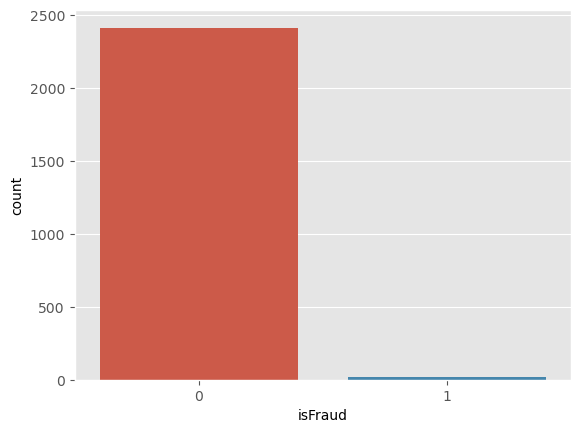

In [23]:
#isFruad:
sns.countplot(data = df,x='isFraud')

In [24]:
df['isFraud'].value_counts()

0    2414
1      16
Name: isFraud, dtype: int64

In [25]:
df.loc[df['isFraud']==0,'isFraud']== 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud']=='isFraud'

2       False
3       False
251     False
252     False
680     False
681     False
724     False
969     False
970     False
1115    False
1116    False
1869    False
1870    False
1911    False
2301    False
2302    False
Name: isFraud, dtype: bool

In [26]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2425,1,PAYMENT,6365.00,C1209962934,0.0,0.00,M2089786414,0.0,0.0,0
2426,1,PAYMENT,26035.82,C336400944,0.0,0.00,M1019157412,0.0,0.0,0
2427,1,PAYMENT,12000.58,C1097380,0.0,0.00,M8268900,0.0,0.0,0
2428,1,PAYMENT,5717.58,C2082353865,0.0,0.00,M943219925,0.0,0.0,0


## Bivariate Analysis

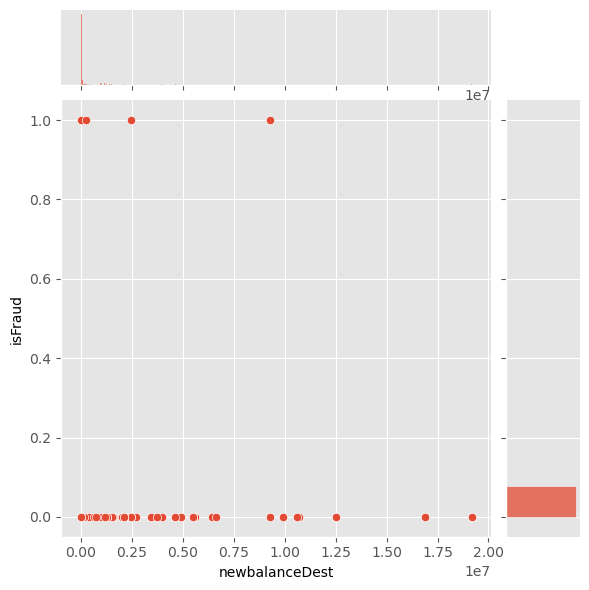

In [27]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

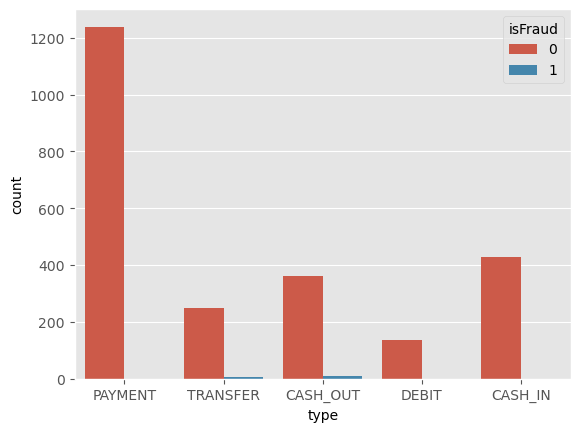

In [28]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

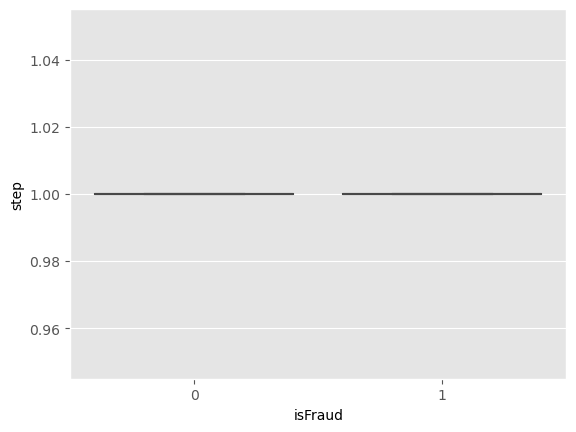

In [29]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

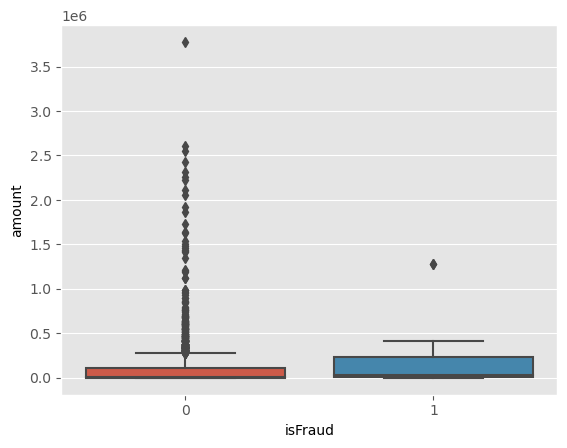

In [30]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

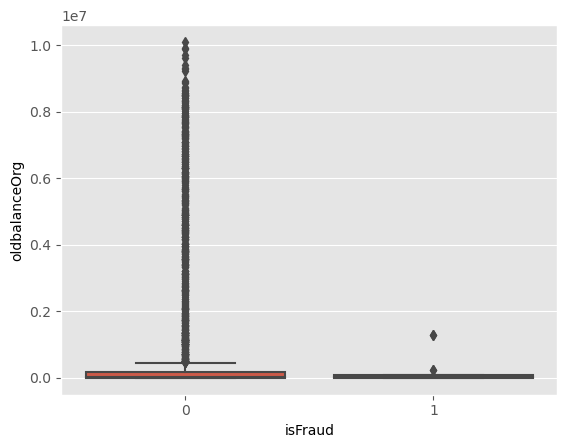

In [31]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

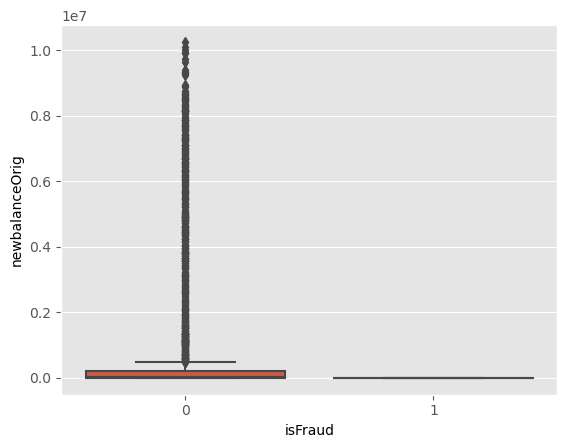

In [32]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

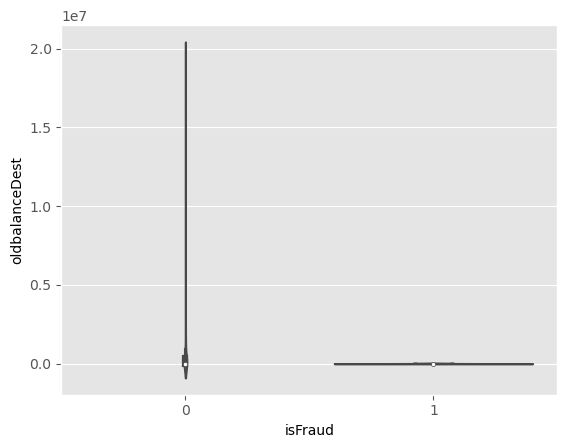

In [33]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

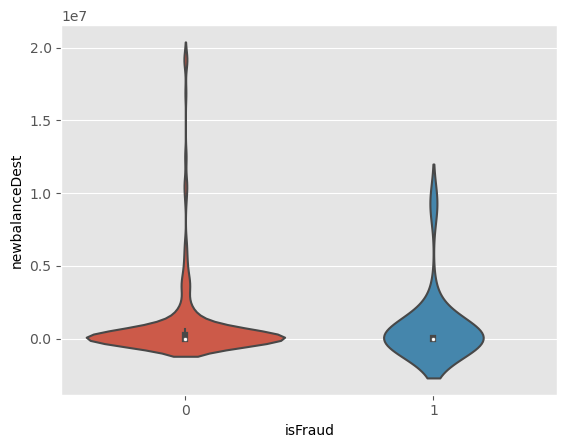

In [34]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

## Descriptive Analysis

In [35]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,2430.0,2430,2.430000e+03,2430,2.430000e+03,2.430000e+03,2430,2.430000e+03,2.430000e+03,2430.000000
unique,NaN,5,NaN,2430,NaN,NaN,1475,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,1239,NaN,1,NaN,NaN,32,NaN,NaN,NaN
mean,1.0,NaN,1.042389e+05,NaN,8.428168e+05,8.610073e+05,NaN,6.945681e+05,9.577771e+05,0.006584
std,0.0,NaN,2.415940e+05,NaN,1.988884e+06,2.032966e+06,NaN,2.139325e+06,2.884811e+06,0.080893
min,1.0,NaN,6.420000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,1.0,NaN,3.925193e+03,NaN,4.100000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,1.0,NaN,1.016283e+04,NaN,2.150900e+04,1.288917e+04,NaN,0.000000e+00,0.000000e+00,0.000000
75%,1.0,NaN,1.144432e+05,NaN,1.852430e+05,1.838776e+05,NaN,3.573560e+05,2.775150e+05,0.000000


## Data Pre-Processing

In [36]:
df.shape

(2430, 10)

In [37]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [38]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


## Checking For Null Values

In [39]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2430 non-null   int64  
 1   type            2430 non-null   object 
 2   amount          2430 non-null   float64
 3   oldbalanceOrg   2430 non-null   float64
 4   newbalanceOrig  2430 non-null   float64
 5   oldbalanceDest  2430 non-null   float64
 6   newbalanceDest  2430 non-null   float64
 7   isFraud         2430 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 152.0+ KB


## Handling Outliers

<Axes: >

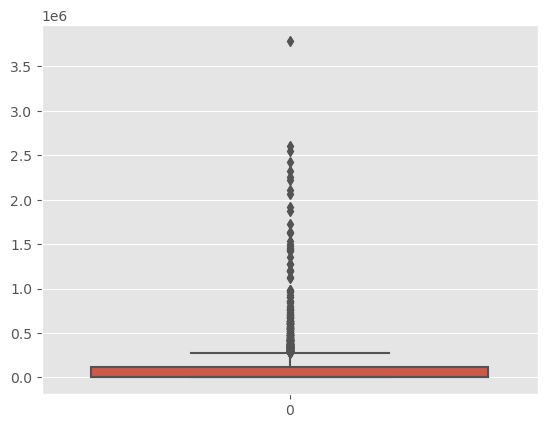

In [41]:
sns.boxplot(df['amount'])

## Remove the Outliers

In [42]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=array([181.]), count=array([2]))
104238.92556790123


In [43]:
q1 = np.quantile(df['amount'], 0.25)

q3 = np.quantile(df['amount'], 0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)

lower_bound = q1-(1.5*IQR)

print('q1 :',q1)
print('q3 :',q3) 
print ('IQR:', IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len (df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 : 3925.1925
q3 : 114443.2425
IQR: 110518.04999999999
Upper Bound : 280220.3175
Lower Bound : -161851.88249999998
Skewed data : 266
Skewed data : 0


In [44]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.displot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)

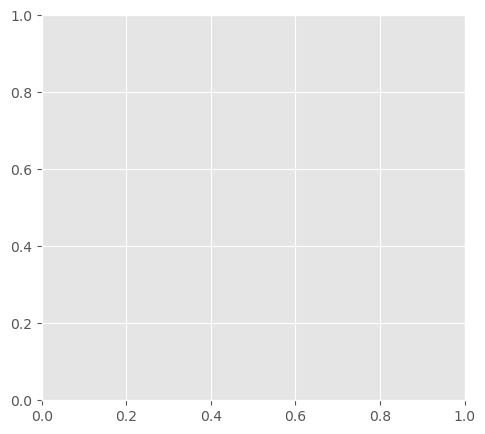

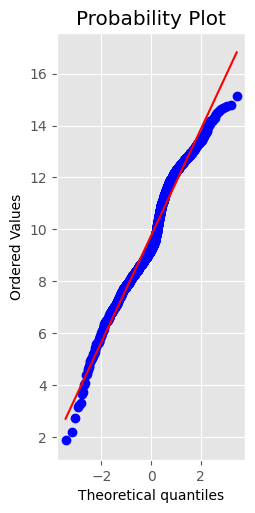

In [45]:
transformationPlot(np.log(df['amount']))

In [46]:
df['amount']=np.log(df['amount'])

In [47]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder() 

In [48]:
df['type'].value_counts()

PAYMENT     1239
CASH_IN      428
CASH_OUT     369
TRANSFER     256
DEBIT        138
Name: type, dtype: int64

In [49]:
x= df.drop('isFraud',axis=1)
y = df['isFraud']

In [50]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9.194174,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,7.530630,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,5.198497,181.0,0.00,0.0,0.0
3,1,CASH_OUT,5.198497,181.0,0.00,21182.0,0.0
4,1,PAYMENT,9.364617,41554.0,29885.86,0.0,0.0
...,...,...,...,...,...,...,...
2425,1,PAYMENT,8.758570,0.0,0.00,0.0,0.0
2426,1,PAYMENT,10.167229,0.0,0.00,0.0,0.0
2427,1,PAYMENT,9.392710,0.0,0.00,0.0,0.0
2428,1,PAYMENT,8.651301,0.0,0.00,0.0,0.0


In [51]:
y

0       0
1       0
2       1
3       1
4       0
       ..
2425    0
2426    0
2427    0
2428    0
2429    0
Name: isFraud, Length: 2430, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
le = LabelEncoder()
x['type'] = le.fit_transform(x['type'])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1944, 7)
(486, 7)
(486,)
(1944,)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9938271604938271

In [55]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [56]:
df['type'].value_counts()

3    1239
0     428
1     369
4     256
2     138
Name: type, dtype: int64

In [57]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [58]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.0,160296.36,0.0,0.0
1,1,3,7.530630,21249.0,19384.72,0.0,0.0
2,1,4,5.198497,181.0,0.00,0.0,0.0
3,1,1,5.198497,181.0,0.00,21182.0,0.0
4,1,3,9.364617,41554.0,29885.86,0.0,0.0
...,...,...,...,...,...,...,...
2425,1,3,8.758570,0.0,0.00,0.0,0.0
2426,1,3,10.167229,0.0,0.00,0.0,0.0
2427,1,3,9.392710,0.0,0.00,0.0,0.0
2428,1,3,8.651301,0.0,0.00,0.0,0.0


In [59]:
y

0       0
1       0
2       1
3       1
4       0
       ..
2425    0
2426    0
2427    0
2428    0
2429    0
Name: isFraud, Length: 2430, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1944, 7)
(486, 7)
(486,)
(1944,)


## Model Building

#### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9938271604938271

In [63]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [64]:
pd.crosstab(y_test,y_test_predict1)

col_0,0
isFraud,
0,483
1,3


In [65]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.00      0.00      0.00         3

    accuracy                           0.99       486
   macro avg       0.50      0.50      0.50       486
weighted avg       0.99      0.99      0.99       486



## Decision tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9938271604938271

In [67]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [68]:
pd.crosstab(y_test,y_test_predict2)

col_0,0,1
isFraud,,
0,482,1
1,2,1


In [69]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       0.50      0.33      0.40         3

    accuracy                           0.99       486
   macro avg       0.75      0.67      0.70       486
weighted avg       0.99      0.99      0.99       486



## extra tree classifier

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9917695473251029

In [71]:
y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [72]:
pd.crosstab(y_test,y_test_predict3)

col_0,0,1
isFraud,,
0,482,1
1,3,0


In [73]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.00      0.00      0.00         3

    accuracy                           0.99       486
   macro avg       0.50      0.50      0.50       486
weighted avg       0.99      0.99      0.99       486



## Support vector machine classifier

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9938271604938271

In [75]:
y_train_predict4=svc.predict(x_train)
train_accuracy= accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9933127572016461

In [76]:
pd.crosstab(y_test,y_test_predict4)

col_0,0
isFraud,
0,483
1,3


In [77]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.00      0.00      0.00         3

    accuracy                           0.99       486
   macro avg       0.50      0.50      0.50       486
weighted avg       0.99      0.99      0.99       486



In [78]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [79]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_train1=la.fit_transform(y_train)

In [80]:
y_test1=la.transform(y_test)

In [81]:
y_test1=la.transform(y_test)

In [82]:
y_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
y_train1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## xgboost classifier

In [84]:
import xgboost as xgp
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9958847736625515

In [85]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict5)
train_accuracy

1.0

In [86]:
pd.crosstab(y_test1,y_test_predict5)


col_0,0,1
row_0,,
0,483,0
1,2,1


In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      0.33      0.50         3

    accuracy                           1.00       486
   macro avg       1.00      0.67      0.75       486
weighted avg       1.00      1.00      0.99       486



## compare the models

In [88]:
print("tain accuracy for rfc",accuracy_score(y_train_predict1,y_train))
print("tain accuracy for rfc",accuracy_score(y_test_predict1,y_test))
print("tain accuracy for dtc",accuracy_score(y_train_predict2,y_train))
print("tain accuracy for dtc",accuracy_score(y_test_predict2,y_test))
print("tain accuracy for etc",accuracy_score(y_train_predict3,y_train))
print("tain accuracy for etc",accuracy_score(y_test_predict3,y_test))
print("tain accuracy for svc",accuracy_score(y_train_predict4,y_train))
print("tain accuracy for scvv",accuracy_score(y_test_predict4,y_test))
print("tain accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
print("tain accuracy for xgb1",accuracy_score(y_test_predict5,y_test))

tain accuracy for rfc 1.0
tain accuracy for rfc 0.9938271604938271
tain accuracy for dtc 1.0
tain accuracy for dtc 0.9938271604938271
tain accuracy for etc 1.0
tain accuracy for etc 0.9917695473251029
tain accuracy for svc 0.9933127572016461
tain accuracy for scvv 0.9938271604938271
tain accuracy for xgb1 1.0
tain accuracy for xgb1 0.9958847736625515


## evaluating the performance of the model

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9938271604938271

In [90]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9933127572016461

In [91]:
import pickle
pickle.dump(svc, open('payments.pkl','wb'))